<a href="https://colab.research.google.com/github/karuna3laka/Sentimental-Analyzing-for-Texts/blob/main/Sentimental_Analiziz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Testing Sentimental analizis

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Changed 'stlye' to 'style'
plt.style.use('ggplot')

import nltk


In [6]:
df=pd.read_csv('/content/Reviews.csv')

In [7]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [9]:
print(df.shape)
df.head()

(6263, 10)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


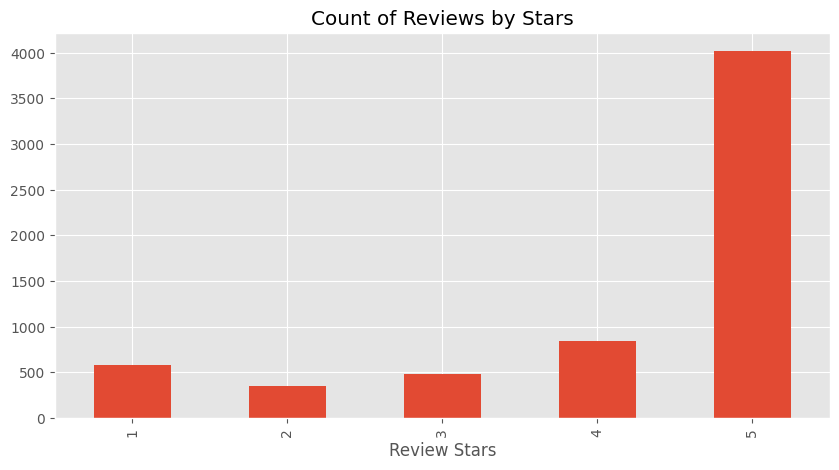

In [10]:
ax = df['Score'].value_counts().sort_index() \
    .plot(kind='bar',
          title='Count of Reviews by Stars',
          figsize=(10, 5))
ax.set_xlabel('Review Stars')
plt.show()

In [11]:
sample=df['Text'][34]
print(sample)

Instant oatmeal can become soggy the minute the water hits the bowl. McCann's Instant Oatmeal holds its texture, has excellent flavor, and is good for you all at the same time. McCann's regular oat meal is excellent, too, but may take a bit longer to prepare than most have time for in the morning. This is the best instant brand I've ever eaten, and a very close second to the non-instant variety.<br /><br />McCann's Instant Irish Oatmeal, Variety Pack of Regular, Apples & Cinnamon, and Maple & Brown Sugar, 10-Count Boxes (Pack of 6)


In [12]:
sample2=df['Text'][374]
print(sample2)

This is just Fantastic Chicken Noodle soup, the best I have ever eaten, with large hearty chunks of chicken,and vegetables and nice large noodles. This soup is just so full bodied, and is seasoned just right.  I am so glad Amazon carries this product.  I just can't find it here in Vermont.


negative sentiments


In [18]:
import nltk

# Download the 'punkt_tab' resource
nltk.download('punkt_tab')

# Now, try tokenizing the text and assign the result to 'tokens'
tokens = nltk.word_tokenize(sample2)

tokens[:10] # Now 'tokens' is defined and can be sliced


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


['This',
 'is',
 'just',
 'Fantastic',
 'Chicken',
 'Noodle',
 'soup',
 ',',
 'the',
 'best']

In [21]:
import nltk

# Download the required resource
nltk.download('averaged_perceptron_tagger_eng')

# Now, try using pos_tag again
tagged=nltk.pos_tag(tokens)

tagged[:10] #printing first 10

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


[('This', 'DT'),
 ('is', 'VBZ'),
 ('just', 'RB'),
 ('Fantastic', 'JJ'),
 ('Chicken', 'NNP'),
 ('Noodle', 'NNP'),
 ('soup', 'NN'),
 (',', ','),
 ('the', 'DT'),
 ('best', 'JJS')]

In [24]:
import nltk

# Download the required resource: 'maxent_ne_chunker_tab'
nltk.download('maxent_ne_chunker_tab')

# Now, try using ne_chunk again
entities = nltk.chunk.ne_chunk(tagged)
entities.pprint()

[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker_tab.zip.


(S
  This/DT
  is/VBZ
  just/RB
  (ORGANIZATION Fantastic/JJ Chicken/NNP Noodle/NNP)
  soup/NN
  ,/,
  the/DT
  best/JJS
  I/PRP
  have/VBP
  ever/RB
  eaten/VBN
  ,/,
  with/IN
  large/JJ
  hearty/JJ
  chunks/NNS
  of/IN
  chicken/NN
  ,/,
  and/CC
  vegetables/NNS
  and/CC
  nice/JJ
  large/JJ
  noodles/NNS
  ./.
  This/DT
  soup/NN
  is/VBZ
  just/RB
  so/RB
  full/JJ
  bodied/VBN
  ,/,
  and/CC
  is/VBZ
  seasoned/VBN
  just/RB
  right/RB
  ./.
  I/PRP
  am/VBP
  so/RB
  glad/JJ
  (ORGANIZATION Amazon/NNP)
  carries/VBZ
  this/DT
  product/NN
  ./.
  I/PRP
  just/RB
  ca/MD
  n't/RB
  find/VB
  it/PRP
  here/RB
  in/IN
  (GPE Vermont/NNP)
  ./.)


***APPLYING VADOR MODEL***




In [25]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [35]:
sia.polarity_scores('i like donut')

{'neg': 0.0, 'neu': 0.286, 'pos': 0.714, 'compound': 0.3612}